In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from pylab import rcParams

import plotly.plotly as py

import plotly.tools as tls

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import pickle

In [81]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/100.csv')

In [3]:
df1.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon
0,1968-02-01,5.9554,NaN,NaN,-29.1428,-32.9766,54.752,-117.2057
1,1968-02-02,7.8870,NaN,NaN,-29.8786,-31.8214,54.752,-117.2057
2,1968-02-03,4.2104,NaN,NaN,-13.9552,-36.3428,54.752,-117.2057
3,1968-02-04,0.0000,NaN,NaN,2.4909,-30.9786,54.752,-117.2057
4,1968-02-05,0.0000,NaN,NaN,0.6552,-24.4662,54.752,-117.2057


In [82]:
df1['discharge'].values

array([   nan,    nan,    nan, ..., 0.0409, 0.0391, 0.0373])

In [83]:
df1['date'] = pd.to_datetime(df1['date'])

df1.index = df1['date']

In [77]:
df3 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_nrcan/100.csv')

In [79]:
df3['discharge'].values

array([   nan,    nan,    nan, ..., 0.0482, 0.0448, 0.0422])

In [84]:
df3['date'] = pd.to_datetime(df3['date'])

# NaNs count for all ENV files

In [48]:
import glob

In [ ]:
ratio = []

for f in glob.glob('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/*.csv'):
    df2 = pd.read_csv(f)
    if (df2.empty):
        pass
    #print(df2.head())
    else:
        streamflow = df2['discharge'].values
        #print(streamflow.shape)
        idx = np.where(np.isnan(streamflow)==True)
        print(f.split('/')[-1].split('.')[0] + " NaN ratio: " + str(len(idx[0])/len(streamflow)))
        ratio.append(len(idx[0])/len(streamflow))

Text(0.5, 1.0, 'Ratio of NaNs per river dataset')

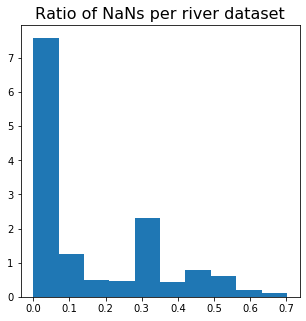

In [100]:
plt.figure(figsize=(5,5))
plt.hist(np.array(ratio), density=True)
plt.title("Ratio of NaNs per river dataset", size=16)

In [ ]:
ratio = []

for f in glob.glob('/network/tmp1/barinpvi/data/preprocessed_canopex_nrcan/*.csv'):
    df2 = pd.read_csv(f)
    if (df2.empty):
        pass
    #print(df2.head())
    else:
        streamflow = df2['discharge'].values
        #print(streamflow.shape)
        idx = np.where(np.isnan(streamflow)==True)
        print(f.split('/')[-1].split('.')[0] + " NaN ratio: " + str(len(idx[0])/len(streamflow)))
        ratio.append(len(idx[0])/len(streamflow))

(array([239.,  39.,  17.,  15.,  73.,  13.,  26.,  16.,   5.,   3.]),
 array([0.        , 0.07183181, 0.14366362, 0.21549543, 0.28732724,
        0.35915905, 0.43099086, 0.50282268, 0.57465449, 0.6464863 ,
        0.71831811]),
 <a list of 10 Patch objects>)

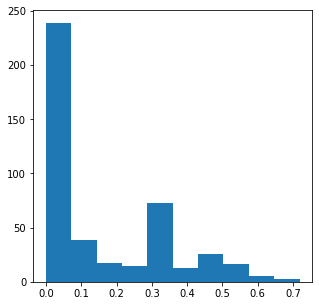

In [93]:
plt.figure(figsize=(5,5))
plt.hist(ratio)

# Daily

Text(0.5, 0, 'Date')

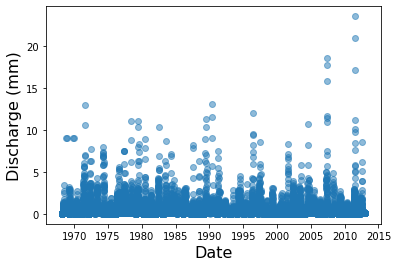

In [26]:
plt.scatter(df1['date'].values, df1['discharge'].values, alpha=0.5)
plt.ylabel("Discharge (mm)", size=16)
plt.xlabel("Date", size=16)

Text(0.5, 0, 'Date')

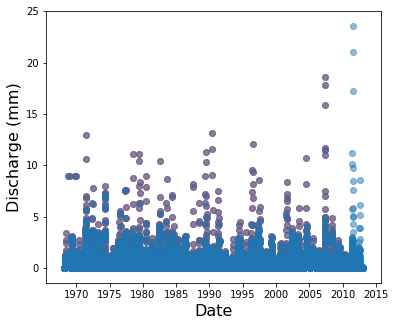

In [89]:
plt.figure(figsize=(6,5))
plt.scatter(df3['date'].values, df3['discharge'].values, alpha=0.5, color='red')
plt.scatter(df1['date'].values, df1['discharge'].values, alpha=0.5)
plt.ylabel("Discharge (mm)", size=16)
plt.xlabel("Date", size=16)

In [123]:
df1.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon
date,,,,,,,,
1968-02-01,1968-02-01,5.9554,NaN,NaN,-29.1428,-32.9766,54.752,-117.2057
1968-02-02,1968-02-02,7.8870,NaN,NaN,-29.8786,-31.8214,54.752,-117.2057
1968-02-03,1968-02-03,4.2104,NaN,NaN,-13.9552,-36.3428,54.752,-117.2057
1968-02-04,1968-02-04,0.0000,NaN,NaN,2.4909,-30.9786,54.752,-117.2057
1968-02-05,1968-02-05,0.0000,NaN,NaN,0.6552,-24.4662,54.752,-117.2057


In [124]:
streamflow = df1['discharge']

In [125]:
streamflow = streamflow.fillna(method='bfill')

In [126]:
idx = np.where(np.isnan(streamflow)==True)

In [127]:
len(idx[0])

0

In [128]:
streamflow

date
1968-02-01    0.0181
1968-02-02    0.0181
1968-02-03    0.0181
1968-02-04    0.0181
1968-02-05    0.0181
               ...  
2012-12-27    0.0429
2012-12-28    0.0418
2012-12-29    0.0409
2012-12-30    0.0391
2012-12-31    0.0373
Name: discharge, Length: 16406, dtype: float64

In [136]:
len(df1['date'].dt.year.unique())

45

In [138]:
len(df1)

16406

# Autocorrelation

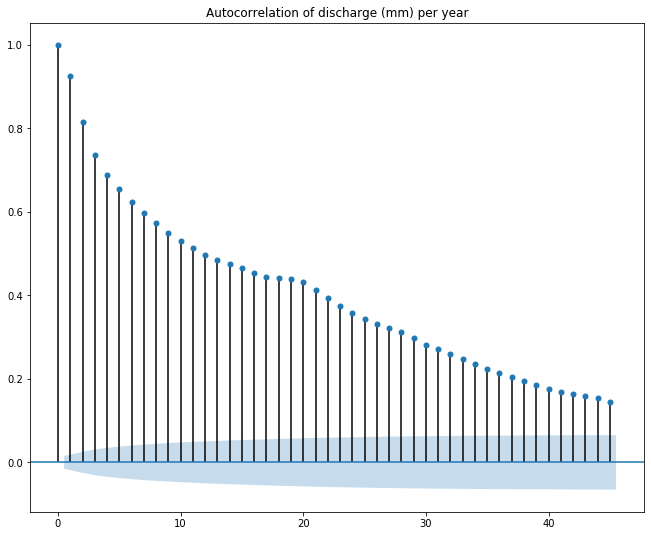

In [141]:
plot_acf(streamflow, lags=45, title="Autocorrelation of discharge (mm) per year")
plt.show()

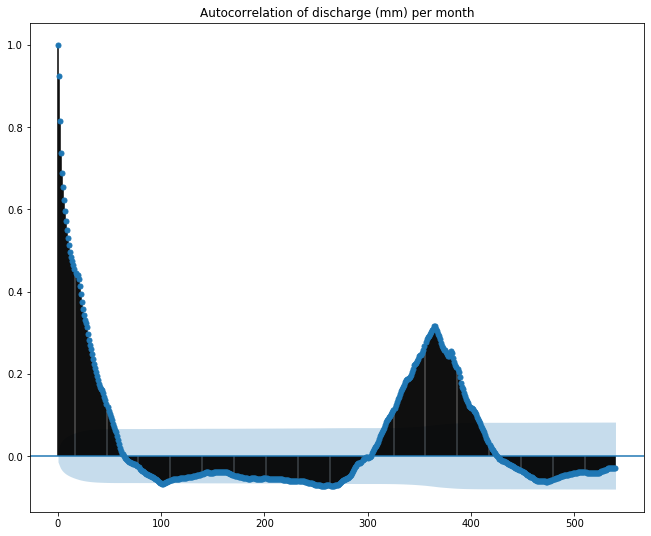

In [142]:
plot_acf(streamflow, lags=45*12, title="Autocorrelation of discharge (mm) per month")
plt.show()

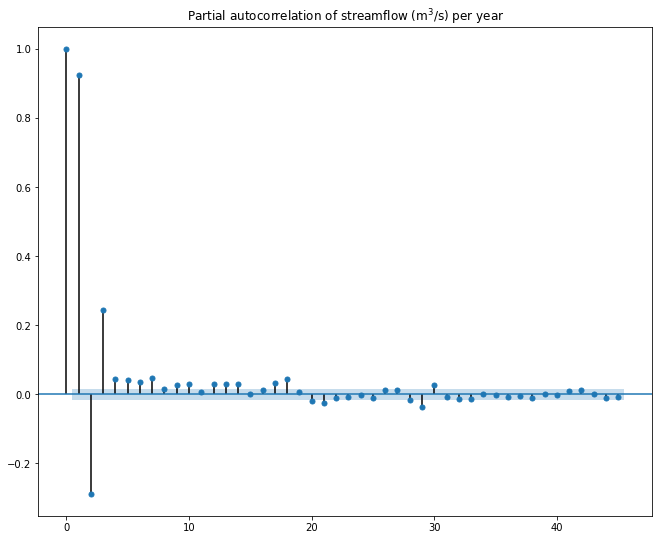

In [152]:
plot_pacf(streamflow, lags=45, title="Partial autocorrelation of streamflow (m$^3$/s) per year")
plt.show()

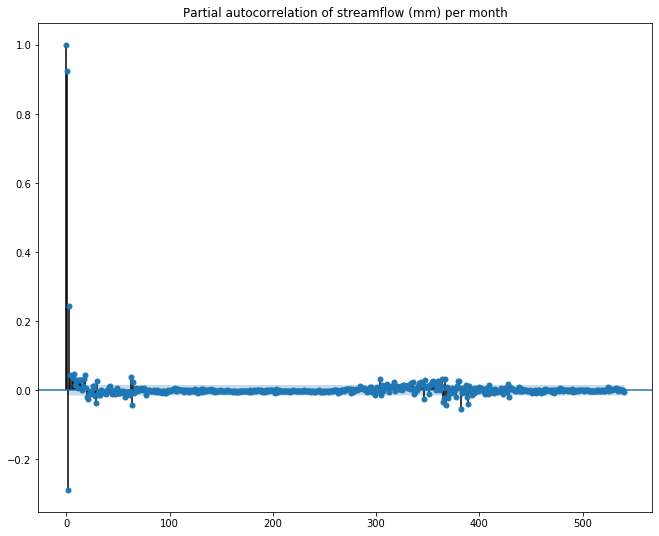

In [153]:
plot_pacf(streamflow, lags=45*12, title="Partial autocorrelation of streamflow (mm) per month")
plt.show()

# Decomposition

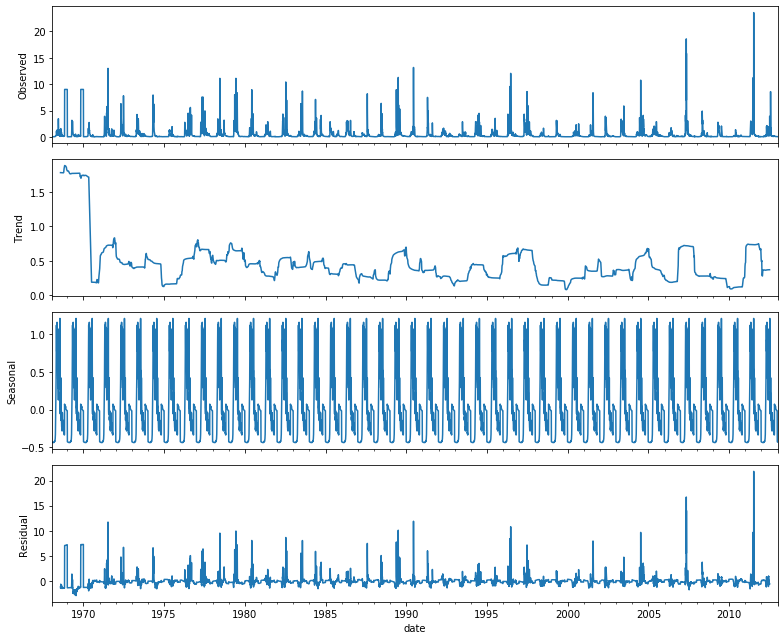

In [129]:
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(streamflow,freq=365) # once per year
figure = decomposed.plot()
plt.show()

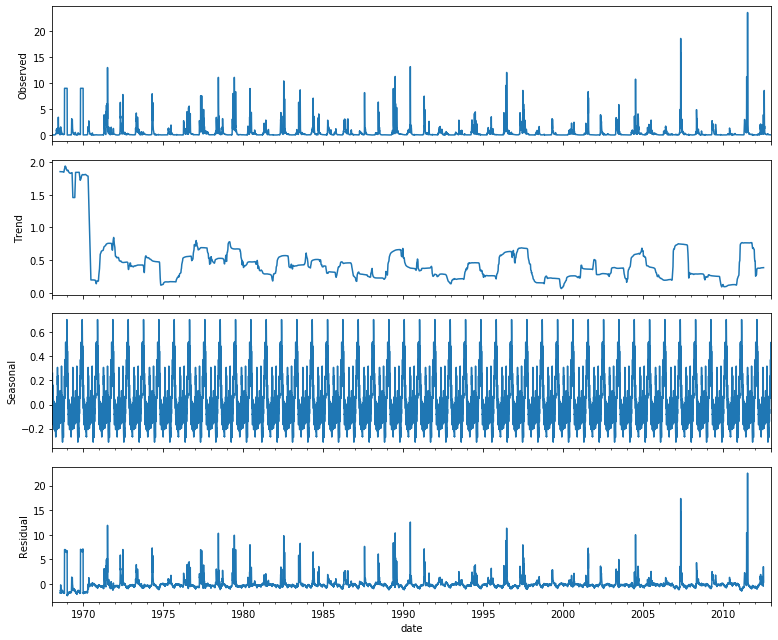

In [157]:
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(streamflow,freq=350) # once per year
figure = decomposed.plot()
plt.show()

In [160]:
x = decomposed.trend - decomposed.resid

In [161]:
x

date
1968-02-01   NaN
1968-02-02   NaN
1968-02-03   NaN
1968-02-04   NaN
1968-02-05   NaN
              ..
2012-12-27   NaN
2012-12-28   NaN
2012-12-29   NaN
2012-12-30   NaN
2012-12-31   NaN
Name: discharge, Length: 16406, dtype: float64

In [164]:
y = streamflow - decomposed.seasonal

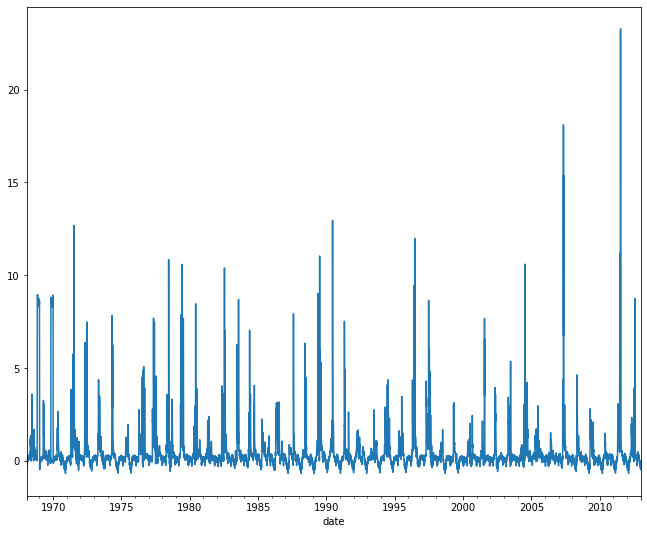

In [165]:
y.plot()

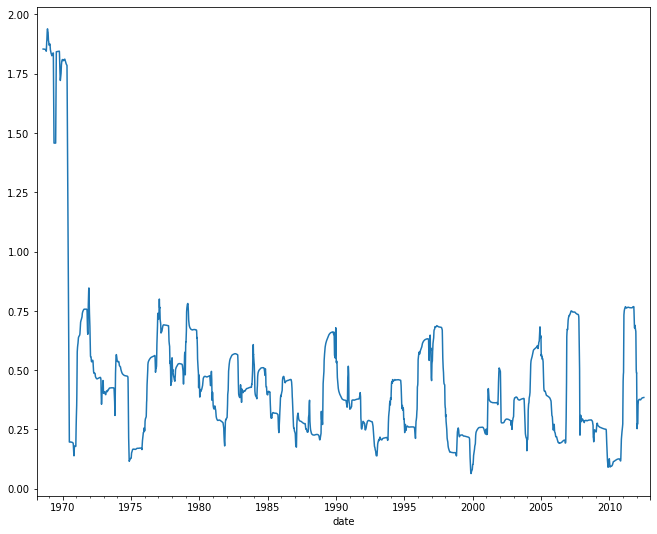

In [162]:
decomposed.trend.plot()

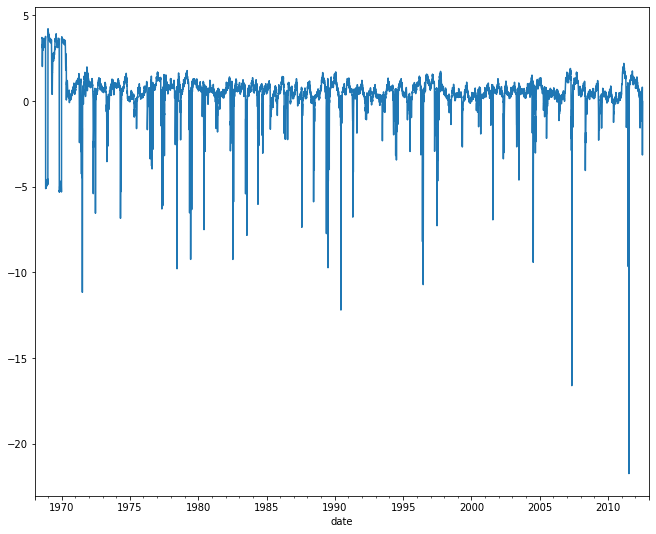

In [163]:
x.plot()